---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, será abordado o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs* (empresa do setor de tecnologia e financeiro). Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Fraudes de cartão de crédito pode acontecer quando alguém usa as informações do seu cartão para fazer transações que não foram autorizadas. Isso pode acontecer se uma pessoa roubar o seu cartão, as informações do cartão, se o clonarem, abrir contas em seu nome.

<p align=center>
<img src="https://images.unsplash.com/photo-1589758438368-0ad531db3366?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=889&q=80" width="40%"></p>

Dentre as fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Há diversas formas de se proteger dessas fraudes como: acionar alertas do banco, destruir extratos em papel, proteger o computador e celular, usar redes seguras para fazer transações bancárias, manter o controle diário do que entra e sai, etc. Mas convenhamos que nem sempre podemos fazer isso, além de que elas não são formas que dão tanta segurança em relação a prevenção das fraudes de cartão de crédito, apenas diminuem as chances. 

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de *machine learning* apenas um pouco melhor que os anteriores já representa uma economia de milhões de reais. E esse é o desafio: aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usados neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://image.freepik.com/vector-gratis/personas-telefonos-inteligentes-que-utilizan-aplicacion-banca-movil_74855-5917.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

sns.set_style('dark')

Para facilitar a aquisição dos dados, será utilizado um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Toda fase que envolva *Data Science* é importante ter uma Análise Exploratória de Dados para que se entenda o dado. Essa etapa é a que normalmente se consegue extrair diversos *insights* e possibilita o entendimento dos dados, para que assim seja feita a correta manipulação.

Entender os dados é de grande importância para fazer um modelo de *machine learning*, para que assim avalie se o que está sendo obtido é realmente satisfatório ou não. Não tem como entender o que vai acontecer (predição) sem antes entender o que já aconteceu (os dados analisados).

### Ver as 5 primeiras entradas

In [3]:
#See the head of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Ao analisar as primeiras entradas do conjunto de dados percebe-se que, conforme foi dito ateriormente, todos os dados são numéricos. Cada uma das colunas corresponde a uma variável diferente, os nomes delas foram colocadas em "códigos" por causa do sigilo do próprio banco.

### Ver o resumo estatístico do dataframe

O resumo estatístico permite ver diversas informações importantes, tais quais:  

* Contagem de números em cada uma das colunas (**count**): Importante para saber se determinada coluna tem mais, menos ou o mesmo valor das outras. 
* Média (**mean**), desvio padrão (**std**): É a medida do valor mais utilizado. É calculada somando todos os valores presentes em uma coluna e divida pela quantidade total de valores. É uma imformação muito importante, mas também muito sensível a presença de *outliers*.

* Menor valor presente na coluna (**min**): Importante para ter noção se a distribuição dos dados é homogena. Para ter essa noção tem que fazer uma comparação com o primeiro, segundo e terceiro quartil, assim como o valor máximo.

* Primeiro quartil (**25%**): É o número de representa o 25% dos dados, ou seja, 1/4 dos dados.

* Segundo quartil (**50%**): Representa o valor que está no meio dos dados. É a mediana.

* Terceiro quartil (**75**): Valor que representa 75%, deixando apenas 25% deles acima.

* Valor máximo da coluna (**max**): Maior valor de cada uma das colunas. 

In [4]:
#See the dataset statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Ao analisar o resumo estatístico é perceptível que em algumas colunas há uma variação considerável entre o valor presente no terceiro quartil (75%) para o valor máximo da coluna, como por exemplo nas colunas `V2`, `V4`, `V5`. Isso pode ser um sinal de que há *outliers* no *dataset*.

Um ponto que leva a pensar que tem que aprofundar a análise é que o desvio padrão de cada coluna é pequeno. **O desvio padrão é uma medida que indica a dispersão dos dados dentro de uma amostra com relação à média**. Ou seja, não muita variação de cada valor da coluna em relação ao valor médio.

A média, por sua vez, pode mostrar a suspeita de que há *outliers*, porque quando há presença o seu valor fica bastante discrepante. Ela tem que ser semelhante a mediana, se os dados forem homogêneos, mas ao analisar a mediana percebe-se que isso não é verdade, há bastante diferença em algumas colunas. 

Tudo isso leva a ter mais certa que os dados não estão organizados da melhor forma possível.

### Verificar se há valores ausentes

A verificação da presença de valores ausentes é de grande importância, porque caso tenha eles devem ser tratados de alguma forma para que não atrapalhe a análise final. 

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O conjunto de dados não possui dados ausentes, o que é bastante favorável já que assim não é necessário fazer modificações nesse sentido.

### Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*

As próprias pessoas que forneceram o conjunto de dados informarão que ele está desbalanceado, mas é importante saber o quão grande é esse desbalanceamento. 

Dados desbalanceados também atrapalham a análise, um dos fatores mais preocupantes em deixar os dados desbalanceados é que o modelo emitirá muitos alarmes falsos e isso, obviamente, está longe do ideal. 

Qualquer *dataset* que tenha mais de 50% dos dados para um determinado lado é considerado desbalanceado. 

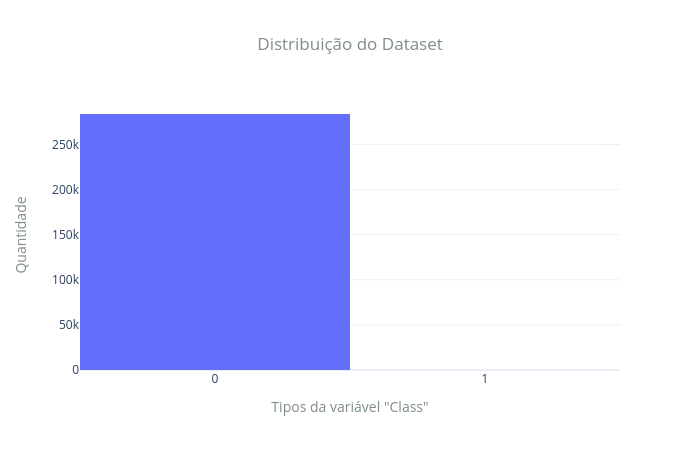

In [6]:
#Plot the countplot
data = go.Histogram(x = df['Class'])
configuracoes_layout = go.Layout(
    title={
        'text': 'Distribuição do Dataset', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center',
        'font': {'color': '#7f8c8d'}},
    xaxis={
        'title': 'Tipos da variável "Class"',
        'tickvals': np.arange(0, 2, 1),
        'titlefont': {'color': '#7f8c8d'}
        },
    yaxis={
        'title': 'Quantidade',
        'titlefont': {'color': '#7f8c8d'}},
    template='plotly_white'
    )
fig = go.Figure(data=data, layout=configuracoes_layout)
#py.iplot(fig)
fig.show("png")

Percebe-se a má distribuição dos dados, a maior parte esmagadora dos dados estão categorizados como 0 (não há fraude), e quase nada como 1 (há fraude), isso mostra o desbalancemento dos dados. Visto que o objetivo é analisar a detecção de fraude em cartão de crédito esse desbalancemento atrapalha a real avaliação.

### Plotar histogramas

Os histogramas mostram a distribuição da frequẽncia. A altura de cada uma das barras mostra a frequẽncia que cada uma das classes acontecem. Esse gráfico pode ser utilizado como um indicador de dispersão também, já que ele mostra como os dados estão distribuidos. Mostrando, também, onde o valor central está localizado.

Há alguns tipos de distribuições dos histogramas:

##### 1 - Simétrico

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Simetrico.jpg">
</p>

Como pode ser visto na imagem a característica forte desse tipo de histograma é que a frequẽncia mais alta está localizada no centro. Essa é a conhecida distribuição normal. Acontece quando os dados são estáveis, apenas com pequenas variações (demonstrado pelas barras nas laterais do pico).

##### 2 - Assimétrico

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Assimetrico.jpg">
</p>

Normalmente esse tipo de histograma acontece quando os dados são tolerados até um número limite. O pico é concentrado em um dos lados, os dados que estão fora do padrão decrescem para o lado oposto desse pico. Ele representa uma grande variação dos dados. 

##### 3 - Despenhadeiro

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Despenhadeiro.jpg">
</p>

Os valores mais altos se concentram totalmente à direita ou à esquerda. Possui o valor médio fora do centro. Esse tipo de histograma é gerado quando há algum dados estatístico faltando. 

##### 4 - Dois Picos

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Dois-Picos.jpg">
</p>

Esse tipo de gráfico também é conhecido como <u>bimodal</u>. O fato de dois picos indica que há mais de uma frequẽncia alta nos dados. Nesse caso a análise deve ser feita separadamente. 

##### 5 - Platô (Achatado)

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Achatado.jpg">
</p>

Esse gráfico ocorre quando há anormalidade nos dados devido a falhas. Todas as barras possuem praticamente o mesmo tamanho.

##### 6 - Pico Isolado

<p align=center>
    <img alt="Colaboratory logo" height="200px" src="http://www.fm2s.com.br/wp-content/uploads/2020/09/Ilha-Isolada.jpg">
</p>

Possui como característica uma grande barra em destaque, se comparada com as demais. Essa grande diferença, de forma geral, indicam falhas na coleta dos dados. 

[Fonte](https://www.fm2s.com.br/histograma/)

### Fazendo Histograma 

Para fazer os histogramas serão consideradas as sequintes variáveis:

* Variável `Time`
    * Fraude (`Class == 1`)
    * Normal (`Class == 0`)
* Variável `Amount`
    * Fraude (`Class == 1`)
    * Normal (`Class == 0`)

Como pode ser visto o histograma será separado em **fraude** e **sem fraude**, para que seja possível ver separadamente como os dados estão.

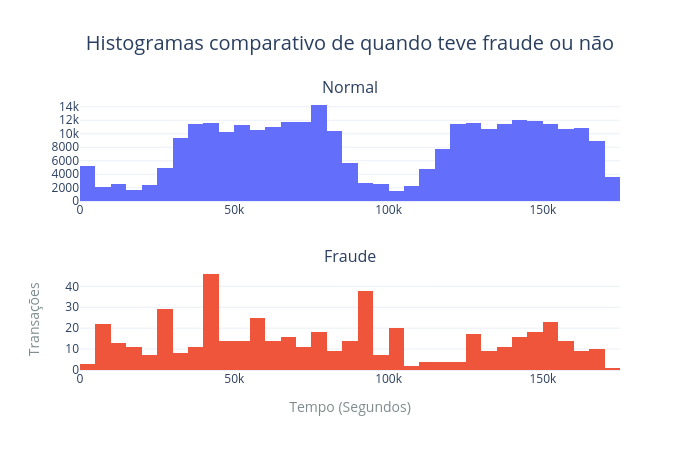

In [7]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Normal', 'Fraude'))

fig.add_trace(go.Histogram( 
    x = df['Time'][df['Class'] == 0],
    nbinsx = 40
    ), 1, 1)

fig.add_trace(go.Histogram( 
    x = df['Time'][df['Class'] == 1],
    nbinsx = 40
    ), 2, 1)

data = go.Histogram(x = df['Class'])
fig.update_layout(
    title={
        'text': 'Histogramas comparativo de quando teve fraude ou não', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center'},
    xaxis2={
        'title': 'Tempo (Segundos)',
        'titlefont': {'color': '#7f8c8d'}
        },
    yaxis={ 
        'range': [0, 15000], 
        'tickvals': np.arange(0, 15000, 2000)},
    yaxis2={
        'title': 'Transações',
        'titlefont': {'color': '#7f8c8d'}},
    template='plotly_white',
    autosize=False,
    width=800,
    height=500,
    showlegend=False
    )
#py.iplot(fig)
fig.show("png")

Visto as características de cada um tipo de histogram e o resultado gerado ao analisar a variável `time`, percebe-se que os dados realmente não estão distribuidos da forma correta, não chegam nem perto da distribuição normal. 

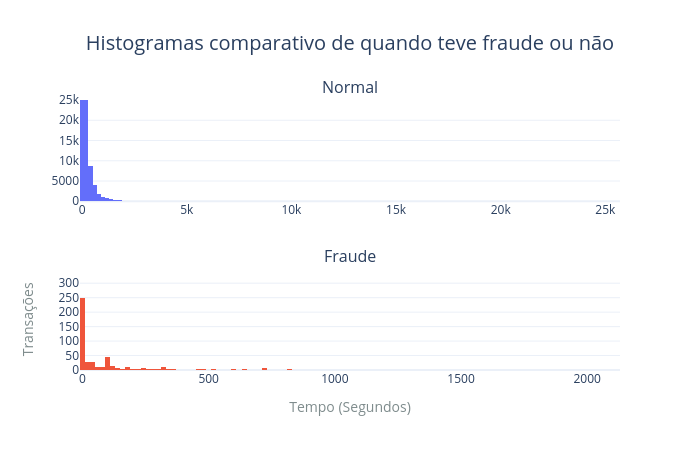

In [8]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Normal', 'Fraude'))

fig.add_trace(go.Histogram( 
    x = df['Amount'][df['Class'] == 0],
    nbinsx = 150
    ), 1, 1)

fig.add_trace(go.Histogram( 
    x = df['Amount'][df['Class'] == 1],
    nbinsx = 150
    ), 2, 1)

data = go.Histogram(x = df['Class'])
fig.update_layout(
    title={
        'text': 'Histogramas comparativo de quando teve fraude ou não', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center'},
    xaxis2={
        'title': 'Tempo (Segundos)',
        'titlefont': {'color': '#7f8c8d'}
        },
    yaxis={ 
        'range': [0, 25000], 
        'tickvals': np.arange(0, 26000, 5000)},
    yaxis2={
        'title': 'Transações',
        'titlefont': {'color': '#7f8c8d'}, 
        'range': [0, 350], 
        'tickvals': np.arange(0, 350, 50)},
    template='plotly_white',
    autosize=False,
    width=800,
    height=500,
    showlegend=False
    )
#py.iplot(fig)
fig.show("png")

Ao verificar a variável `amount` também é perceptível a não homogeneidade da distribuição dos dados. Eles possuem um pico a esquerda, é o tipo despenhadeiro. 

### Boxplot

O boxplot é o gráfico que permite a visualização da distribuição dos dados e dos valores discrepantes (*outliers*). Com isso ele permite o desenvolvimento de uma perspectiva dos dados. 

Além dessa vantagem ele também mostra alguns resultados estatísticos como o valor mínimo, máximo, primeiro segundo e terceiro quartil.

Através da visualização da posição da linha da mediana (segundo quartil) no retângulo é possível saber se os dados possuem uma distribuição simétrica ou não. Se a linha da mediana estiver ao centro do retângulo é uma distribuição simétrica, se estiver mais próxima do primeiro quartil (linha inferior do retângulo) os dados são assimétricos positivos e se estiver próxima ao terceiro quartil (linha superior do retângulo) são dados assimétricos negativos. 

Ao notar que os dados são assimétricos a mediana se torna a medida de tendência central mais indicada, visto que a média é muito influenciada pelos valores extremos. 

[Fonte](https://operdata.com.br/blog/como-interpretar-um-boxplot/#:~:text=O%20boxplot%20nos%20fornece%20uma,a%20mediana%20ou%20segundo%20quartil)

#### Plotar um `boxplot` para a variável `Amount` quando houve e não houve fraude (`Class == 0` e `Class == 1`)

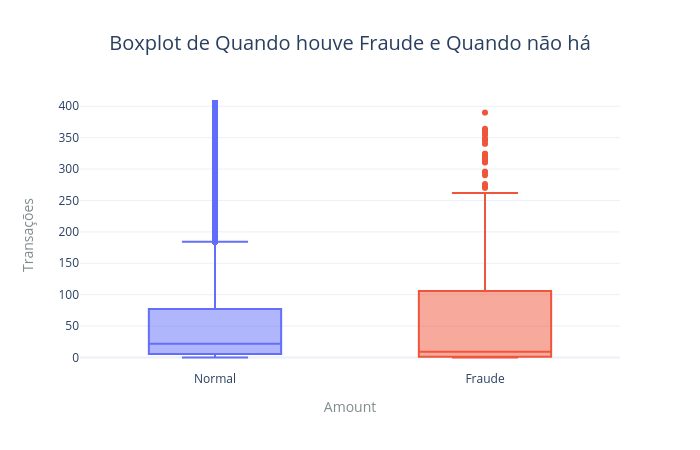

In [9]:
fig = go.Figure()

fig.add_trace(go.Box(y = df['Amount'][df['Class'] == 0], name='Normal'))

fig.add_trace(go.Box(y = df['Amount'][df['Class'] == 1], name='Fraude'))

fig.update_layout(
    title={
        'text': 'Boxplot de Quando houve Fraude e Quando não há', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center'},
    xaxis={
        'title': 'Amount',
        'titlefont': {'color': '#7f8c8d'}
        },
    yaxis={ 
        'title': 'Transações',
        'titlefont': {'color': '#7f8c8d'},
        'range': [-20, 410], 
        'tickvals': np.arange(0, 450, 50)},
    template='plotly_white',
    autosize=False,
    width=1200,
    height=500,
    showlegend=False
    )
#py.iplot(fig)
fig.show("png")

Com o *boxplot* plotado nota-se que há presença de *outliers* (diversos pontos na parte superior), além disso percebe-se que os dados não são simétricos, já que a linha no meio do retângulo não está no centro igual deveria, por estar mais próxima da linha inferior (primeiro quartil) é uma assimetria positiva. 

Como dito anteriormente, para casos de assimetria a mediana se torna o dado de medida central mais confiável. Mas o ponto mais importante aqui é ver, novamente, a má distribuição dos dados. 

O acima dos valores do meio (200) do *boxplot* referente as transações normais são apenas *outliers*. O segundo *boxplot* possui um pouco menos, mas ainda é algo a se preocupar. Além de que o segundo possui uma melhor distribuição não porque os dados estão melhores, mas sim porque possui bem menos dados (como visto no gráfico de barras).

### Matriz de Correlação

Uma matriz de correlação mostra a relação entre duas variáveis, o valor do resultado varia de -1 a 1, onde -1 é onde as variáveis possuem uma relação inversamente proporcional, ou seja, sempre que uma aumenta a outra diminui proporcionalmente. Já quando o valor é 1 é uma relação diretmente proporcional, as duas variáveis mudam seus valores na mesma direção e proporcionalmente. 

Como pode ser percebido a matriz de correlação é utilizada para ver a força e a direção da relação entre duas variáveis. Quanto mais alto e positivo for a correlação, mais os itens medem a mesma habilidade ou característica. E se os itens não estão altamente correlacionados medem diferentes características ou não estão claramente definidos.

Uma correlação superior a 0.7 já é considerada uma alta correlação. 


#### Plotar uma matriz de correlação

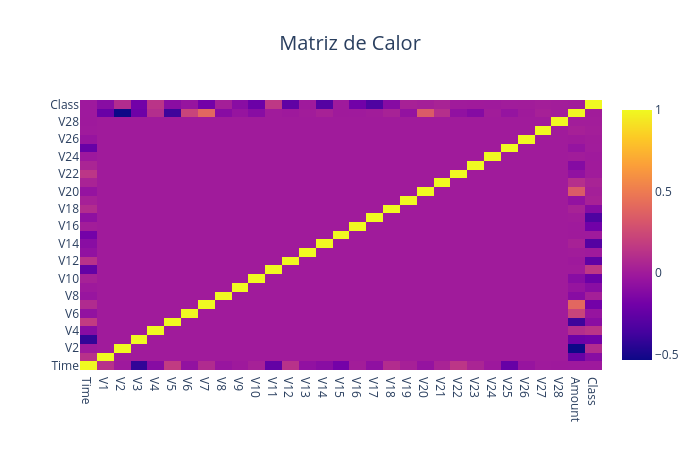

In [10]:
fig = go.Figure()

fig.add_trace(go.Heatmap(z = df.corr(), x = df.columns, y = df.columns))

fig.update_layout(
    title={
        'text': 'Matriz de Calor', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center'},
    template='plotly_white',
    autosize=False,
    width=800,
    height=600,
    showlegend=False
    )
#py.iplot(fig)
fig.show("png")

### Gráfico de Densidade

O gráfico de densidade é responsável por mostrar a distribuição ao longo dos dois eixos dos dados numéricos, agrupados em intervalos.

É uma versão suavizada do histograma. É utilizada no mesmo conceito.

#### Plotando o gráfico de densidade

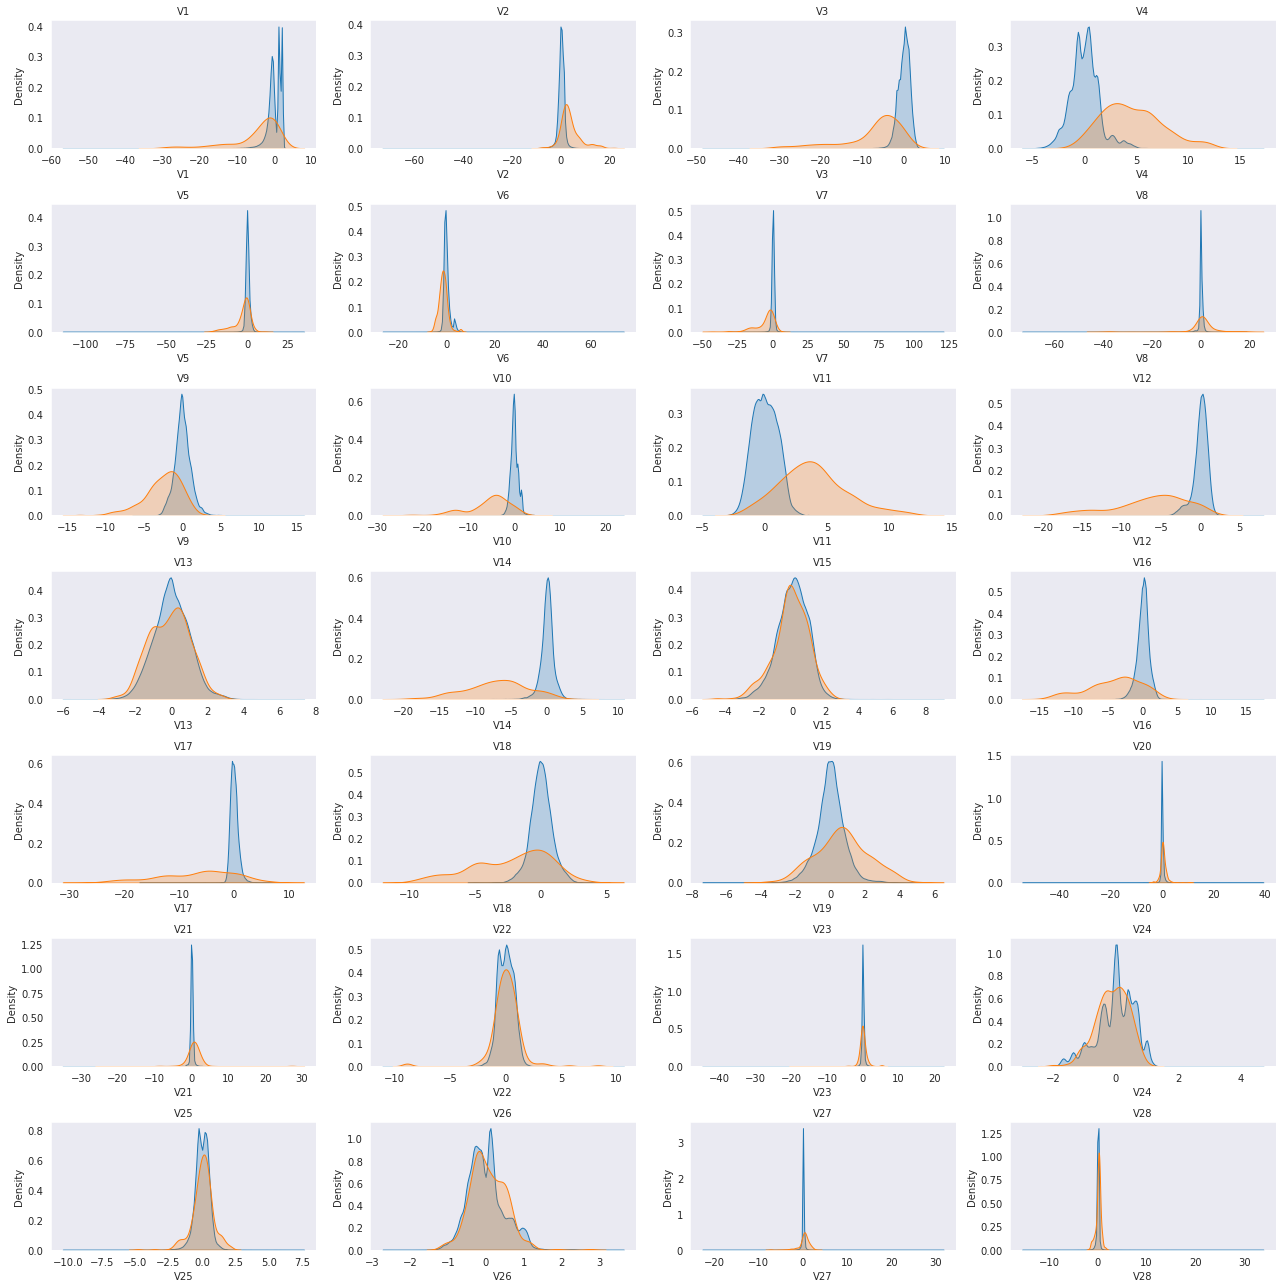

In [11]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Pelo gráfico de densidade é visível que há diferença de distribuição das variáveis quando há fraude e quando não há.

#### Conclusões da Análise Exploratória de Dados:

* Os dados estão desbalanceados;
* Por mais que haja desbalanceamento, não há valores nulos para serem tratados;
* As colunas `Amount` e `Time` não foram normalizadas.

Com todos os pontos levantados, comprova-se a importância de fazer a análise exploratória de dados, sem ela as informações que prejudicam a produção de um bom modelo não seriam descobertas, dessa forma o resultado não seria satisfatório e, provavelmente, nem se saberia o porquê, gerando retrabalho. Com essas conclusões é possível preparar os dados para poder fazer o modelo. 

## Preparação dos Dados

#### Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)

A forma mais comum de normalizar os dados é pegar cada uma das colunas, tirar a média delas e dividir cada unidade por essa média. 

Exemplo:
 * Altura: 1,65m, 1,85m, 1,88m
 * Peso: 75 Kg, 90 Kg, 80 Kg 

Tem duas colunas e quer saber a soma delas, mas não da para fazer o somatório porque a coluna peso tem mais importância do que a altura, já que a sua variação é maior. Por isso é necessário normalizar. 

Para fazer isso será retirada a média da coluna altura:

$$
media-altura = \frac{1,65 + 1,85 + 1,88}{3} = 1,79m
$$

$$
media-peso = \frac{75 + 90 + 80}{3} = 81,67Kg
$$

Normalizando os dados:

$$
\frac{1,65}{1,79} = 0,92
$$

E assim sucessivamente. 

A biblioteca *Scikit-learn* tem uma função que faz essa padronização de forma fácil o *`StandardScaler`*, para saber mais sobre essa função basta acessar [esse link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).


In [12]:
df_padronized = df.copy()

std_scaler = StandardScaler()
df_padronized['std_amount'] = std_scaler.fit_transform(df_padronized['Amount'].values.reshape(-1, 1))
df_padronized['std_time'] = std_scaler.fit_transform(df_padronized['Time'].values.reshape(-1, 1))

df_padronized = df_padronized.drop(['Amount', 'Time'], axis = 1)

df_padronized.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


As colunas `Amount` e `Time` foram excluídas e no lugar delas foram adicionadas duas novas colunas com os valores normalizados (vide as últimas colunas do novo conjunto de dados).

#### Dividir o conjunto de dados entre treino e teste

Ao construir um modelo não é desejado que ele seja bons para os dados do passado, mas sim que ele seja bom para os dados conhecidos e desconhecidos. Os dados são divididos em treino e teste para garantir isso, primeiro os dados são treinados com uma parte do conjunto de dados e depois é analisado o quanto o modelo é bom para dados desconhecidos (os dados de teste).

Esse passo está sendo feito antes de balancear os dados porque se não não terá os parâmetros necessários para saber se o balanceamento realmente foi a escolha certa.

In [13]:
#Split the data to feature matrix and target vector 
X = df_padronized.drop('Class', axis = 1)
y = df_padronized['Class']

#Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Balancear o conjunto de dados

Para balancear os dados será utilizada a função *`RandomUnderSampler`* da biblioteca ***Imblearn***. Essa função é adequada justamentemente para balancear o conjunto de dados. 

1    371
0    371
Name: Class, dtype: int64
/home/renata/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



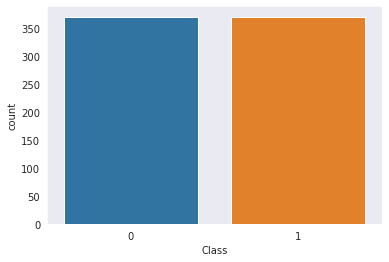

In [14]:
#Using the under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#See the balance
print(pd.Series(y_rus).value_counts())

#Plot the new distribution 
sns.countplot(y_rus);

Ao ver o resultado obtido e o gráfico percebe-se que agora os dados não estão mais desbalanceados.

#### Matriz de correlação

Com os dados balanceados é possível ver a real relação entre cada uma das variáveis. Para ver a diferença será plotada duas matrizes, uma com dados desbalanceados e outra com os dados já balanceados. 

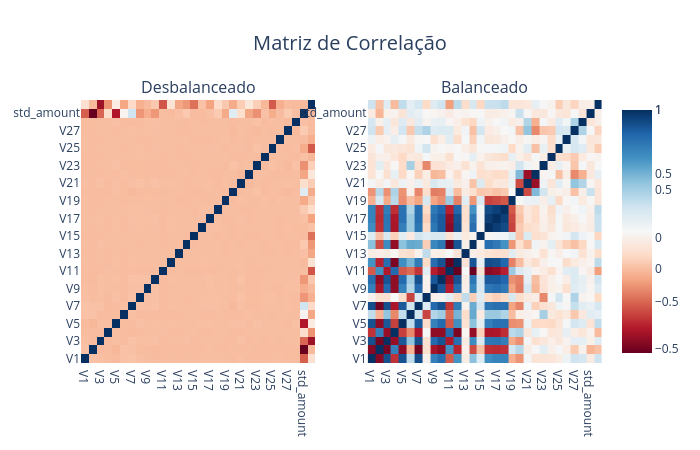

In [15]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Desbalanceado", "Balanceado"))

corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig.add_trace(go.Heatmap(z = corr, x = corr.columns, y = corr.columns, colorscale="RdBu"), row = 1, col = 1)
fig.add_trace(go.Heatmap(z = corr_rus, x = corr_rus.columns, y = corr_rus.columns, colorscale="RdBu"), row = 1, col = 2)

fig.update_layout(
    title={
        'text': 'Matriz de Correlação', 
        'font': {'size': 20}, 
        'x': 0.5,
        'xanchor':'center'},
    template='plotly_white',
    autosize=False,
    width=1000,
    height=600,
    showlegend=False
    )
#py.iplot(fig)
fig.show("png")

A diferença entre os dois gráficos é enorme, o gráfico da esquerda que possui os dados desbalanceados não transmite nenhuma imformação relevante. Já o que tem os dados balanceados é possível ver uma correlação (tanto positiva quanto negativa) entre diversas variáveis, algumas até bem fortes.

## Modelo de Machine Learning

### Modelo para Classificação

Os métodos de classificação fazem uma categorização de cada resposta em uma determinada categoria. Ele busca classificar com um número limitado de *labels*. A confiança de tipo de modelo está ligada a uma probabilidade. 

**Exemplo**: Fazer a classificação se um e-mail é spam ou não. Há duas respostas possíveis, duas categorias. Outros modelos podem ter mais categorias, o importante é entender essa separação.

#### Regressão Logística

Para a construção do primeiro modelo será utilizado a função *`LogisticRegression`*, que faz uma regressão logística. Esse tipo de classificação permite estimar a probabilidade que está associada à ocorrência de um determinado evento. Ao fazer essa regressão há uma camada que faz com que utilize a função sigmóide, com isso os resultados obtidos ficam entre 0 e 1. 

In [16]:
#Choose the hyperparameters
np.random.seed(2)
model = LogisticRegression()

#Fit the model (train the model)
model.fit(X_train, y_train)

#Make the prevision in the data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

#### Árvores de Decisão

As árvores de decisão são um processo de indução, ou seja, os dados são divididos em subconjuntos cada vez mais puros. Os dados são divididos por ordem de importância, até que chegue em um resultado satisfatório. 

O gráfico gerado de uma árvore consiste em folhas, conhecidas como nós, e ramos. Cada um dos nós representa um conjunto de dados de uma classificação (representada pelos ramos).

In [17]:
#Choose the hyperparameters
model_tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')

#Fit the model (train the model)
model_tree.fit(X_train, y_train)

#Make the prevision in the data
y_pred_tree = model_tree.predict(X_test)
y_proba_tree = model_tree.predict_proba(X_test)

### Desempenho do modelo

#### Identificar a melhor métrica para os modelos

A função *`classification_report`* cria um relatório com as principais métricas de classificação. 

* ***Precision*** (Precisão): Número de exemplos classificados como pertencente a uma determinada classe, que realmente são daquela classe (verdadeiro positivo), dividido pela soma entre esse número e o número de exemplos classificados nesta classe, mas pertencentes a outra. 
* ***Recall***: Número de exemplos classificados como pertencentes a uma determinada classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencentem a esta classe, mesmo que estejam classificados em outra. 
* ***F1-Score***: É uma média harmônica entre precisão e recall. 
* ***Accuracy***: É o número de acertos (positivos) dividido pelo número total de exemplos.

[Fonte](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/#:~:text=Precis%C3%A3o%20(Precision),a%20outras%20(falsos%20positivos).)

In [18]:
#Classification relatory
print("Relatório de Classificação Regressão Logística")
print(classification_report(y_test, y_pred))

print("Relatório de Classificação Árvore de Decisão")
print(classification_report(y_test, y_pred_tree))

Relatório de Classificação Regressão Logística
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.90      0.60      0.72       121

    accuracy                           1.00     71202
   macro avg       0.95      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202

Relatório de Classificação Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.94      0.77      0.85       121

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [19]:
#Acuracy of the model
print('Acurácia da Regressão Logística: {:4f}\n'.format(accuracy_score(y_test, y_pred)))
print('Acurácia da Árvore de Decisão: {:4f}\n'.format(accuracy_score(y_test, y_pred_tree)))

Acurácia da Regressão Logística: 0.999199

Acurácia da Árvore de Decisão: 0.999522



A acurácia não é indicada para dados desbalanceados, dados que não possuem a mesma proporção de exemplos para cada classe. Isso é porque em problemas de classes desproporcionais ela causa uma falsa impressão de bom desempenho.

Para esse tipo de dados é mais indicado utilizar a *AUC (Area Under the ROC Curve)*, porque ela mede o desempenho do modelo em vários pontos de corte.

In [20]:
#Curve area
print('AUC Regressão Logística: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))
print('AUC da Árvore de Decisão: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree)))

AUC Regressão Logística: 0.7975

AUC da Árvore de Decisão: 0.8843



A matriz confusão também será plotada para poder ver a taxa de acerto para as operações fraudulentas.

/home/renata/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



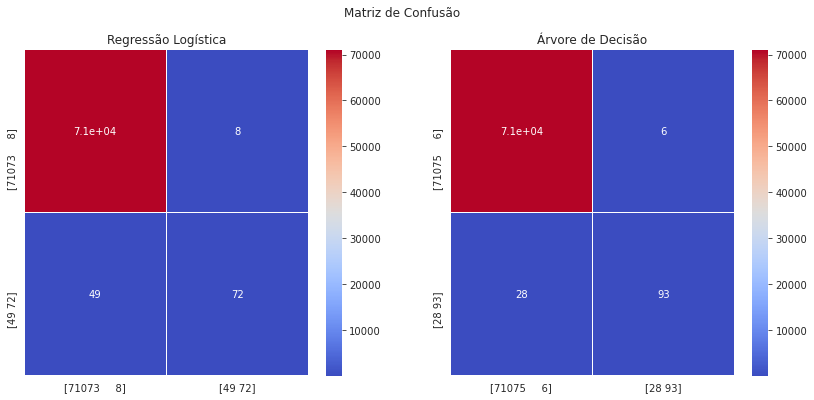

In [21]:
#Show the confusion matrix
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

logistic_regression = confusion_matrix(y_test, y_pred)
tree = confusion_matrix(y_test, y_pred_tree)

fig.suptitle('Matriz de Confusão')

sns.heatmap(logistic_regression, xticklabels=logistic_regression, yticklabels=logistic_regression,
            linewidths=.1, cmap="coolwarm", ax=ax[0], annot=True)
ax[0].set_title('Regressão Logística')

sns.heatmap(tree, xticklabels=tree, yticklabels=tree,
            linewidths=.1, cmap="coolwarm", ax=ax[1], annot=True)
ax[1].set_title('Árvore de Decisão')

plt.show()

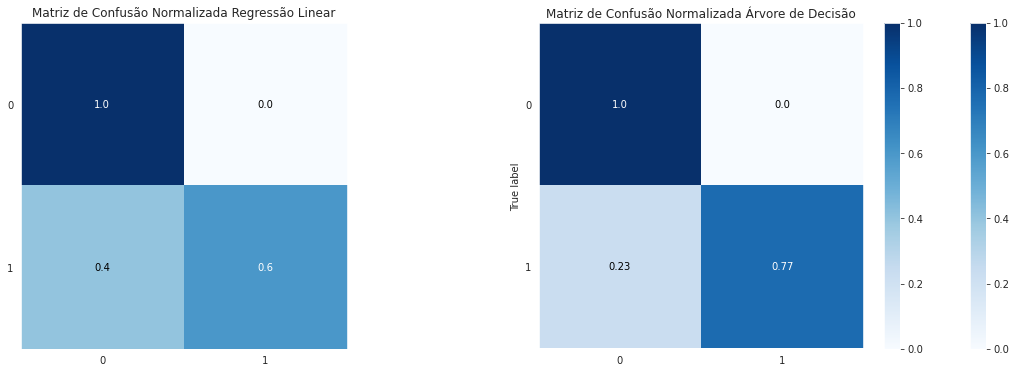

In [22]:
#Confusion matrix normalized
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,6))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True, ax = ax[0])
ax[0].set_title('Matriz de Confusão Normalizada Regressão Linear')
ax[0].xaxis.label.set_visible(False)
ax[0].yaxis.label.set_visible(False)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize = True, ax = ax[1])
ax[1].set_title('Matriz de Confusão Normalizada Árvore de Decisão')
ax[1].xaxis.label.set_visible(False)
ax[1].xaxis.label.set_visible(False);

## Conclusão

O conjunto de dados, por mais que ele já tenha vindo tratado e limpo, não era um conjunto muito simples de ser utilizado, visto que seus dados estavam muito desbalanceados. Diversas ações foram necessárias antes de realmente construir o modelo, diversos cuidados foram requeridos também. Isso tudo é bem importante, pois os conjuntos da vida realmente não são os mais tranquilos de se lidar. 

Após toda os cuidados realizados, os modelos foram construídos. O modelo que obteve melhor resultado foi o de Árvore de decisão, tanto na acurácia (parâmetro ruim para avaliar nesse caso) quanto para a área sobre a curva. 

Ainda é possível utilizar mais modelos para poder descobrir qual é realmente o melhor.